In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus']=False 
%matplotlib inline

In [2]:
file=r'C:\Users\user\Desktop\iis_airbox_202010{}.csv'
res=pd.read_csv(file.format('01'))
for i in range(1,13):
    tmp_read=pd.read_csv(file.format(str(i).zfill(2)))
    res=pd.concat([res,tmp_read],verify_integrity=True,join="inner", ignore_index = True)
res    


,device_id,SiteName,PM25,timestamp
0,74DA38B05400,雲林縣立石榴國小(2017),21,2020-10-01 00:00:00
1,08BEAC0A02D8,臺中市立中山國小(2019),12,2020-10-01 00:00:00
2,08BEAC0A0476,雲林縣縣立古坑國小(2019),25,2020-10-01 00:00:00
3,74DA38F20DD0,高雄市市立樂群國小(2018),4,2020-10-01 00:00:00
4,08BEAC0A0030,臺中市立潭陽國小(2019),6,2020-10-01 00:00:01
...,...,...,...,...
4385037,08BEAC0A06D2,臺南市市立德南國小(2019),19,2020-10-12 23:59:47
4385038,08BEAC0A0194,臺中市立文昌國小(2019),20,2020-10-12 23:59:47
4385039,08BEAC0A06A8,臺南市市立頂洲國小(2019),14,2020-10-12 23:59:49
4385040,08BEAC09FFEC,臺中市立東寶國小(2019),20,2020-10-12 23:59:49


In [3]:
taichung_mask=res.SiteName.str.contains('臺中')
# kaohsiung_mask=res.SiteName.str.contains('高雄')
taipei_mask=res.SiteName.str.contains(r'^市',regex=True, case=False)
taichung_df=res[taichung_mask]
# kaohsiung_df=res[kaohsiung_mask]
taipei_df=res[taipei_mask]

In [4]:
pd.set_option('mode.chained_assignment', None)
taichung_df['city']=taichung_df['SiteName'].str[0:3]
# kaohsiung_df['city']=kaohsiung_df['SiteName'].str[0:3]
taipei_df['city']=taipei_df['SiteName'].str[0:3]

taichung_df['day']=taichung_df['timestamp'].str.split(' ',expand=True)[0]
# kaohsiung_df['day']=kaohsiung_df['timestamp'].str.split(' ',expand=True)[0]
taipei_df['day']=taipei_df['timestamp'].str.split(' ',expand=True)[0]

taichung_df['time']=(taichung_df['timestamp'].str.split(':',expand=True)[0]).str.split(' ',expand=True)[1]
# kaohsiung_df['time']=(kaohsiung_df['timestamp'].str.split(':',expand=True)[0]).str.split(' ',expand=True)[1]
taipei_df['time']=(taipei_df['timestamp'].str.split(':',expand=True)[0]).str.split(' ',expand=True)[1]

# kaohsiung_df
# taichung_df

In [5]:
# taichung_df[(taichung_df["time"]=="11") & (taichung_df["PM25"]>1000)]
# mask=(taichung_df["PM25"]>1000)
# taichung_df=taichung_df[~mask]

In [6]:
avg_taichung_df=taichung_df.groupby("time").mean()
avg_taichung_df

,PM25
time,
00,20.595939
01,21.095601
02,20.986906
03,20.440023
04,19.875390
05,20.179646
06,20.586242
07,20.337950
08,18.043562


In [7]:
# avg_kaohsiung_df=kaohsiung_df.groupby("time").mean()

In [8]:
avg_taipei_df=taipei_df.groupby("time").mean()
avg_taipei_df

,PM25
time,
00,13.021436
01,12.548302
02,11.538236
03,11.224701
04,10.585185
05,10.619690
06,10.103051
07,9.613579
08,9.658066


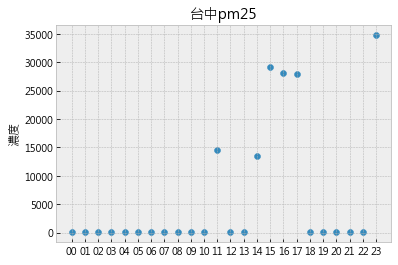

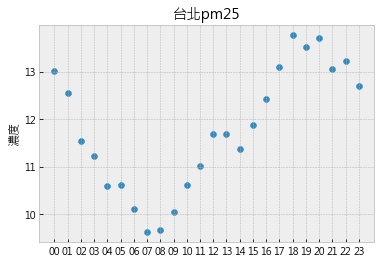

In [10]:
plt.title("台中pm25")
plt.ylabel("濃度")
# plt.xscale('linear')  
# plt.scatter(taichung_df["day"],taichung_df["PM25"])
# avg_taichung_df.plot.scatter(x = "index", y = 'value')
plt.scatter(avg_taichung_df.index,avg_taichung_df)
plt.show()

# plt.title("高雄pm25")
# plt.ylabel("濃度")

# plt.scatter(kaohsiung_df["day"],kaohsiung_df["PM25"])
# plt.scatter(avg_kaohsiung_df.index,avg_kaohsiung_df)

# plt.show()

plt.title("台北pm25")
plt.ylabel("濃度")

# plt.scatter(kaohsiung_df["day"],kaohsiung_df["PM25"])
plt.scatter(avg_taipei_df.index,avg_taipei_df)

plt.show()

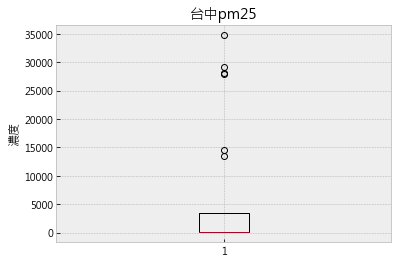

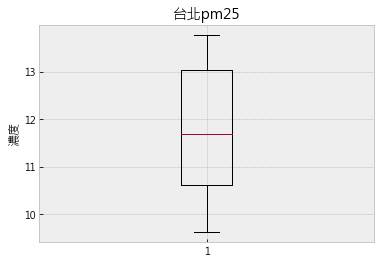

In [11]:
plt.title("台中pm25")
plt.ylabel("濃度")

# fig,ax=plt.subplots()
# ax.set_title('pm25')
# plt.boxplot([taichung_df["PM25"],kaohsiung_df["PM25"]],['台中','高雄'])
plt.boxplot(avg_taichung_df["PM25"])
plt.show()

# plt.title("高雄pm25")
# plt.ylabel("濃度")
# plt.boxplot(avg_kaohsiung_df["PM25"])
# plt.show()
# taichung_df["PM25"]

plt.title("台北pm25")
plt.ylabel("濃度")
plt.boxplot(avg_taipei_df["PM25"])
plt.show()

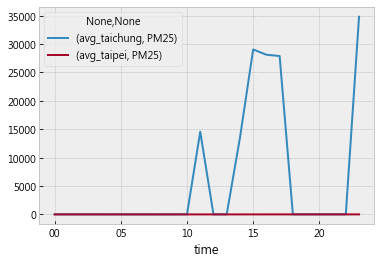

In [12]:

data = pd.concat({'avg_taichung':avg_taichung_df,'avg_taipei':avg_taipei_df},axis=1)
data.plot.line()